# Partie 3 : Visualisation des données de la BD meteo

## Pourcentage de types d'alertes par région

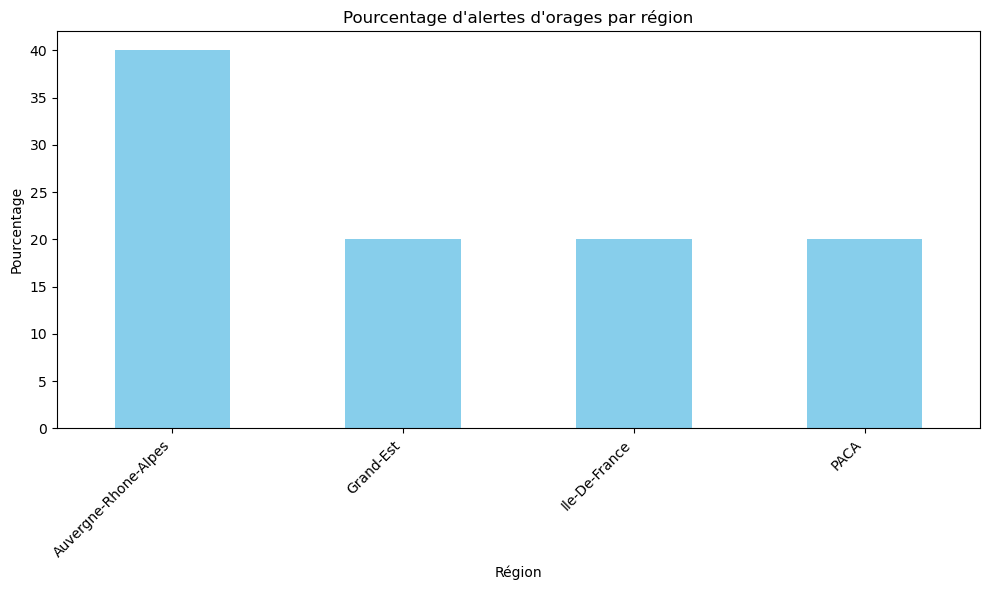

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

lieu = pd.read_csv("LIEU.csv")
station = pd.read_csv("STATION.csv")
releve = pd.read_csv("RELEVE.csv")
mesure = pd.read_csv("MESURE.csv")
alerte = pd.read_csv("ALERTE.csv")

donnees_fusionnees = pd.merge(alerte, lieu, left_on='IDL', right_on='IDL')

alertes_orages = donnees_fusionnees[donnees_fusionnees['CATEGORIE'] == 'Orage']

nombre_alertes_orages_par_region = alertes_orages.groupby('NOML').size()

pourcentage_alertes_orages_par_region = (nombre_alertes_orages_par_region / len(alertes_orages)) * 100

plt.figure(figsize=(10, 6))
pourcentage_alertes_orages_par_region.plot(kind='bar', color='skyblue')
plt.title('Pourcentage d\'alertes d\'orages par région')
plt.xlabel('Région')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Ce diagramme en barre représente le pourcentage d'orages par rapport à toutes les alertes enregistrées par région

## Température maximale et minimale par région

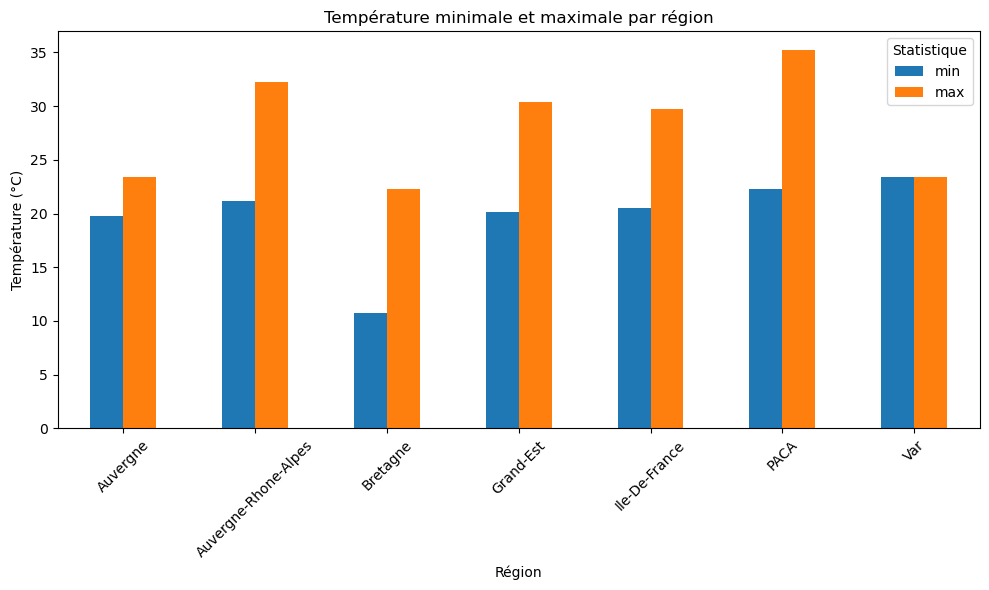

In [3]:
merged = pd.merge(mesure, lieu, left_on='IDR', right_on='IDL')

temp = merged[merged['NOML'] != ''].loc[merged['NOMM'] == 'Temperature']

temp['MESURE'] = temp['MESURE'].astype(float)

temp_min_max = temp.groupby('NOML')['MESURE'].agg(['min', 'max'])

temp_min_max.plot(kind='bar', figsize=(10, 6))
plt.title('Température minimale et maximale par région')
plt.xlabel('Région')
plt.ylabel('Température (°C)')
plt.xticks(rotation=45)
plt.legend(title='Statistique')
plt.tight_layout()
plt.show()

Nous pouvons distinguer, pour chaque région, la température minimale (en bleu), et la température maximale (en orange)

## Analyse de la pression par région

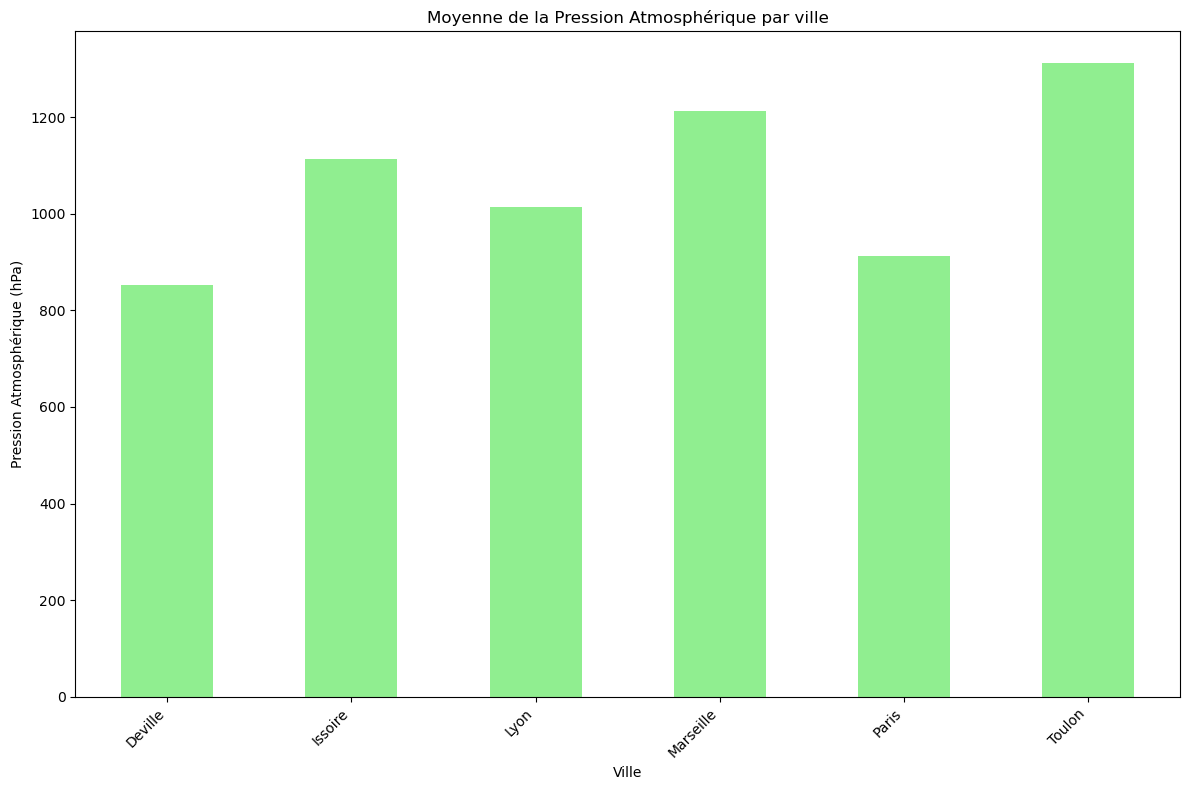

In [6]:
pression_data = mesure[mesure['NOMM'] == 'Pression']

lieu = pd.read_csv("LIEU.csv")

pression_merged = pd.merge(pression_data, lieu, left_on='IDR', right_on='IDL')

pression_moyenne_par_region = pression_merged.groupby('NOML')['MESURE'].mean()

plt.figure(figsize=(12, 8))
pression_moyenne_par_region.plot(kind='bar', color='lightgreen')
plt.title('Moyenne de la Pression Atmosphérique par ville')
plt.xlabel('Ville')
plt.ylabel('Pression Atmosphérique (hPa)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Ce diagramme en barre représente la moyenne de la pression atmosphérique en hPa (hecto-pascal). A des fins de représentation, nous avons mis des pressions assez hautes et assez basses de manière à les distinguer les unes des autres.

## Répartition du nombre d'alertes par région

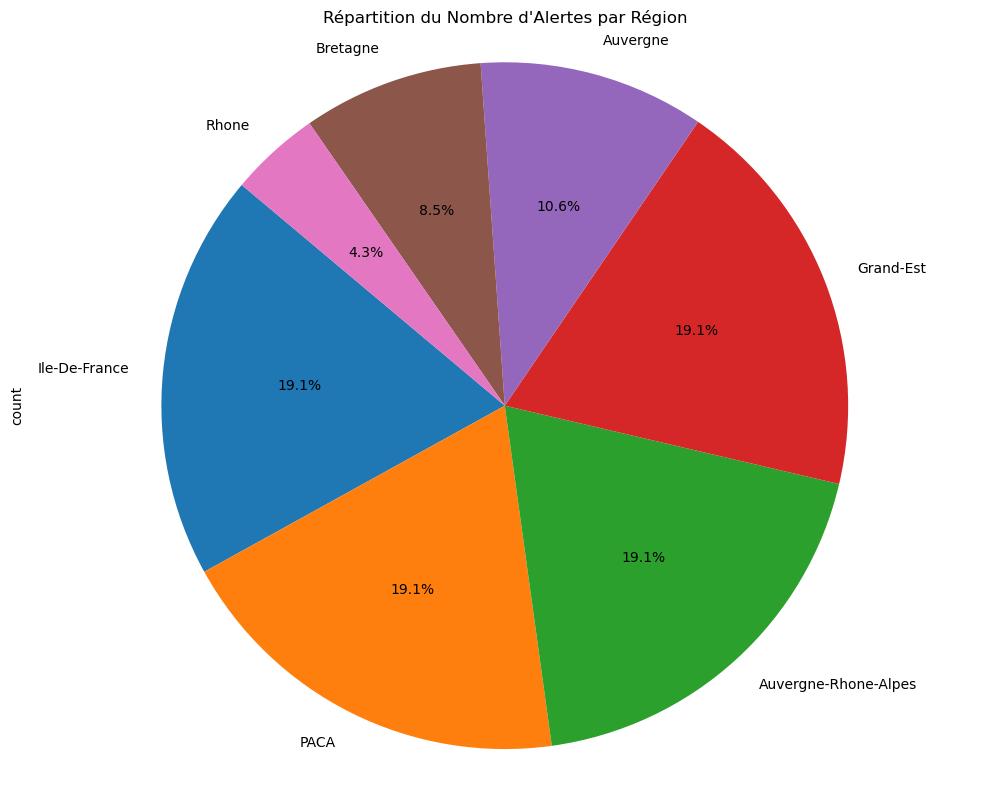

In [7]:
alerte_merged = pd.merge(alerte, lieu, left_on='IDL', right_on='IDL')

nombre_alertes_par_region = alerte_merged['NOML'].value_counts()

plt.figure(figsize=(10, 8))
nombre_alertes_par_region.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Répartition du Nombre d\'Alertes par Région')
plt.axis('equal')  # Assurer que le camembert est circulaire
plt.tight_layout()
plt.show()

Ce diagramme camembert nous montre comment sont réparties les alertes dans les différentes régions. Nous pouvons voir que dans le Rhône, il y a peu d'alertes par rapport à la région PACA.

## Catégories d'alertes en France

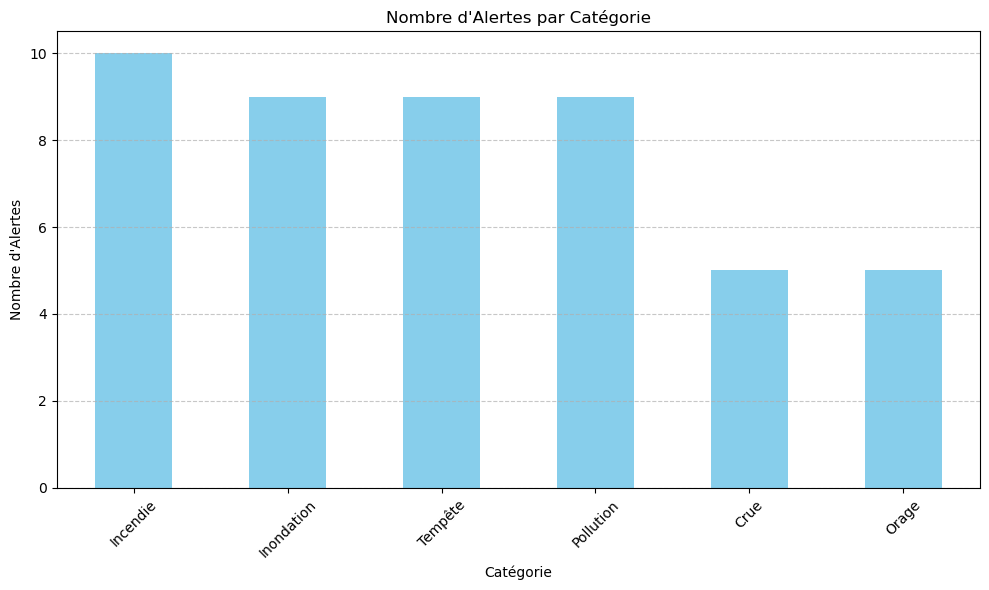

In [8]:
nombre_alertes_par_categorie = alerte['CATEGORIE'].value_counts()

plt.figure(figsize=(10, 6))
nombre_alertes_par_categorie.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'Alertes par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'Alertes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nous pouvons voir grâce à ce diagramme en barre qu'il y a beaucoup plus d'incendies que d'innondations en France.

## Analyse de la pollution par région

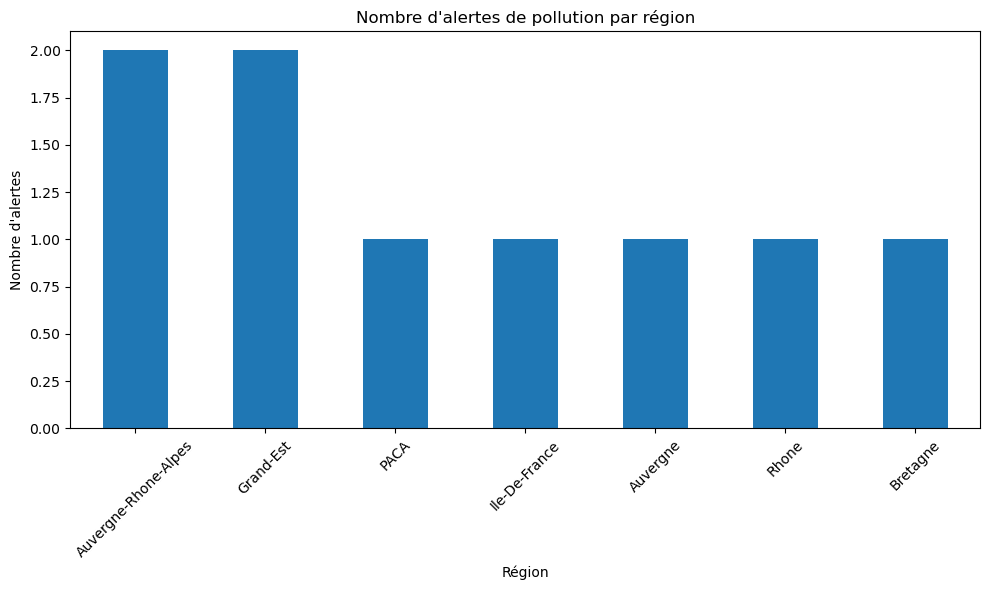

In [9]:
alerte_merged = pd.merge(alerte, lieu, left_on='IDL', right_on='IDL')

pollution = alerte_merged[alerte_merged['CATEGORIE'] == 'Pollution']

pollution_counts = pollution['NOML'].value_counts()

plt.figure(figsize=(10, 6))
pollution_counts.plot(kind='bar')
plt.title('Nombre d\'alertes de pollution par région')
plt.xlabel('Région')
plt.ylabel('Nombre d\'alertes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

L'Auvergne est beaucoup plus polluée que la Bretagne.